In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
plt.rcParams.update({'font.size': 17})

def get_network_results(path):
    '''
    Returns the results of a network training.
    Args:
        path: Path to the results file.
    Returns:
        List of tuples of (epoch, loss, fake_correct, fake_incorrect, real_correct, real_incorrect)
    '''
    results = []
    with open(path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            line = line.split(',')
            epoch = int(line[0].split(': ')[1])
            loss = float(line[1].split(': ')[1])
            fake_correct = int(line[2].split(': ')[1])
            fake_incorrect = int(line[3].split(': ')[1])
            real_correct = int(line[4].split(': ')[1])
            real_incorrect = int(line[5].split(': ')[1])
            results.append((epoch, loss, fake_correct, fake_incorrect, real_correct, real_incorrect))
    return results

def get_accuracy(results):
    '''
    Returns the accuracy of a network.
    Args:
        results: Results of a network training
    Returns:
        List of tuples of (epoch, accuracy)
    '''
    accuracies = []
    for result in results:
        epoch = result[0]
        fake_correct = result[2]
        fake_incorrect = result[3]
        real_correct = result[4]
        real_incorrect = result[5]
        accuracy = (fake_correct + real_correct)/(fake_correct + fake_incorrect + real_correct + real_incorrect)
        accuracies.append((epoch, accuracy))
    return accuracies

def get_f1_real(results):
    '''
    Returns the F1 score of a network.
    Args:
        results: Results of a network training
    Returns:
        List of tuples of (epoch, f1)
    '''
    f1s = []
    for result in results:
        epoch = result[0]
        fake_correct = result[2]
        fake_incorrect = result[3]
        real_correct = result[4]
        real_incorrect = result[5]
        precision = real_correct/(real_correct + fake_incorrect)
        recall = real_correct/(real_correct + real_incorrect)
        f1 = 2 * (precision * recall)/(precision + recall)
        f1s.append((epoch, f1))
    return f1s

def get_f1_fake(results):
    '''
    Returns the F1 score of a network for fake images.
    Args:
        results: Results of a network training
    Returns:
        List of tuples of (epoch, f1)
    '''
    f1s = []
    for result in results:
        epoch = result[0]
        fake_correct = result[2]
        fake_incorrect = result[3]
        real_correct = result[4]
        real_incorrect = result[5]
        precision = fake_correct/(fake_correct + real_incorrect)
        recall = fake_correct/(fake_correct + fake_incorrect)
        f1 = 2 * (precision * recall)/(precision + recall)
        f1s.append((epoch, f1))
    return f1s

def plot_accuracy_train_val(results_train, results_val, name):
    '''
    Plots the accuracy of a network.
    Args:
        results: Results of a network training
        name: Name of the network
    '''
    accuracies_train = get_accuracy(results_train)
    accuracies_val = get_accuracy(results_val)
    epochs = [accuracy[0] for accuracy in accuracies_train]
    accuracy_train = [accuracy[1] for accuracy in accuracies_train]
    accuracy_val = [accuracy[1] for accuracy in accuracies_val]
    plt.xticks(epochs)
    plt.plot(epochs, accuracy_train, label='train')
    plt.plot(epochs, accuracy_val, label='val')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy of {name}')
    plt.legend()
    plt.show()

def plot_f1_real_train_val(results_train, results_val, name):
    '''
    Plots the F1 score of a network.
    Args:
        results: Results of a network training
        name: Name of the network
    '''
    f1s_train = get_f1_real(results_train)
    f1s_val = get_f1_real(results_val)
    epochs = [f1[0] for f1 in f1s_train]
    f1_train = [f1[1] for f1 in f1s_train]
    f1_val = [f1[1] for f1 in f1s_val]
    plt.xticks(epochs)
    plt.plot(epochs, f1_train, label='train')
    plt.plot(epochs, f1_val, label='val')
    plt.xlabel('Epoch')
    plt.ylabel('F1')
    plt.title(f'F1 of {name}')
    plt.legend()
    plt.show()

def plot_f1_fake_train_val(results_train, results_val, name):
    '''
    Plots the F1 score of a network for fake images.
    Args:
        results: Results of a network training
        name: Name of the network
    '''
    f1s_train = get_f1_fake(results_train)
    f1s_val = get_f1_fake(results_val)
    epochs = [f1[0] for f1 in f1s_train]
    f1_train = [f1[1] for f1 in f1s_train]
    f1_val = [f1[1] for f1 in f1s_val]
    plt.xticks(epochs)
    plt.plot(epochs, f1_train, label='train')
    plt.plot(epochs, f1_val, label='val')
    plt.xlabel('Epoch')
    plt.ylabel('F1')
    plt.title(f'F1 of {name}')
    plt.legend()
    plt.show()

def plot_loss_train_val(results_train, results_val, name):
    '''
    Plots the loss of a network.
    Args:
        results: Results of a network training
        name: Name of the network
    '''
    losses_train = [result[1] for result in results_train]
    losses_val = [result[1] for result in results_val]
    epochs = [result[0] for result in results_train]
    plt.xticks(epochs)
    plt.plot(epochs, losses_train, label='train')
    plt.plot(epochs, losses_val, label='val')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Loss of {name}')
    plt.legend()
    plt.show()

def get_predictions(target_results_file):
    '''
    Returns the predictions of a network.
    Args:
        target_results_file: Path to the results file of the target network
    Returns:
        List of tuples of (epoch, prediction)
    '''
    predictions = []
    with open(target_results_file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            if 'prediction' in line:
                prediction = line[line.find('[[')+2:line.find(']]')]
                prediction_vals = prediction.split(', ')
                predictions.append((float(prediction_vals[0]), float(prediction_vals[1])))

    return predictions

def get_predictions2(target_results_file):
    '''
    Returns the predictions of a network.
    Args:
        target_results_file: Path to the results file of the target network
    Returns:
        List of tuples of (epoch, prediction)
    '''
    predictions = []
    with open(target_results_file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            if 'Target prediction' in line:
                prediction = line[line.find('[[')+2:line.find(']]')]
                prediction_vals = prediction.split(', ')
                predictions.append((float(prediction_vals[0]), float(prediction_vals[1])))

    return predictions

def get_prediction_change(target_results_file):
    predictions = get_predictions(target_results_file)
    return predictions[-2][0]/predictions[-1][0]

def plot_prediction_change(poison_numbers):
    poison_predictions = []
    experiment_path = 'results_for_diss/attack_xception_full_baseline'
    for poison_number in poison_numbers:
        experiment_n_path = os.path.join(experiment_path, f'{poison_number}_poisons')
        for folder in os.listdir(experiment_n_path):
            if True:
                poison_predictions.append(get_prediction_change(f'poison_{poison_number}_results.txt'))

def extract_target_results(file):
    predictions_clean = []
    predictions_poisoned = []
    poison_line = True  # Switch between reading poisoned, clean
    with open(file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            if len(line) < 10:
                continue
            prediction = line[line.find('[[')+2:line.find(']]')]
            prediction_vals = prediction.split(', ')
            if poison_line:
                predictions_poisoned.append((float(prediction_vals[0]), float(prediction_vals[1])))
            else:
                predictions_clean.append((float(prediction_vals[0]), float(prediction_vals[1])))
            poison_line = not poison_line
    return predictions_clean, predictions_poisoned



In [2]:
predictions_clean, predictions_poisoned = extract_target_results("results_for_diss/attack_xception_full_baseline/20_poisons/tmp.txt")
x = []
for i in range(len(predictions_clean)):
    print(predictions_poisoned[i][0]/predictions_clean[i][0])
    x.append(predictions_poisoned[i][0]/predictions_clean[i][0])
print('AVG',np.average(x))
print('STD ERROR', np.std(x, ddof=1) / np.sqrt(np.size(x)))
print('######')
x = []
for i in range(len(predictions_clean)):
    print(predictions_poisoned[i][0]-predictions_clean[i][0])
    x.append(predictions_poisoned[i][0]-predictions_clean[i][0])
print('AVG',np.average(x))
print('STD ERROR', np.std(x, ddof=1) / np.sqrt(np.size(x)))


1.6490974231776216e-08
0.010902330390519367
4.077048754790735e-06
0.05154639175257732
1.5952016334864727
2.6096524460550156e-05
0.9114590550090066
70.9870848708487
AVG 9.194528058943934
STD ERROR 8.829970929413259
######
-4.3541999281949995e-05
-2.4871849999999998e-05
-6.549073299000001e-08
-0.046
0.00055968
-3.035420784e-05
-1.9169999999999994e-05
1.213856e-05
AVG -0.005693273123481867
STD ERROR 0.005758550043141281


In [3]:
predictions_clean, predictions_poisoned = extract_target_results("results_for_diss/attack_xception_full_baseline/50_poisons/tmp.txt")
x = []
for i in range(len(predictions_clean)):
    print(predictions_poisoned[i][0]/predictions_clean[i][0])
    x.append(predictions_poisoned[i][0]/predictions_clean[i][0])
print('AVG',np.average(x))
print('STD ERROR', np.std(x, ddof=1) / np.sqrt(np.size(x)))
print('######')
x = []
for i in range(len(predictions_clean)):
    print(predictions_poisoned[i][0]-predictions_clean[i][0])
    x.append(predictions_poisoned[i][0]-predictions_clean[i][0])
print('AVG',np.average(x))
print('STD ERROR', np.std(x, ddof=1) / np.sqrt(np.size(x)))

0.0004418387096774194
2.735283657582423
24002.460299709237
0.22306955036046172
5.864066351746834
10.544847952029937
1.4233591731266151e-07
1.9012366350132755e-07
AVG 3002.7285011740155
STD ERROR 2999.9619817163793
######
-0.0030986303
0.000131741
0.000858484232
-5.5932e-06
0.00040055099999999997
4.2341899999999994e-09
-0.00019349997245799998
-8.361398410299999e-08
AVG -0.00023837832753151287
STD ERROR 0.0004246675468884804


In [4]:
def graph_poison_distances(files, iterations):
    target_dists = [get_poison_target_feature_dist(file) for file in files]
    base_dists = [get_poison_base_dist(file) for file in files]
    x = range(0, iterations, 10)
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    for i in range(len(files)):
        ax1.plot(x, target_dists[i], 'g-', label='Target')
        ax2.plot(x, base_dists[i], 'b-', label='Base')
    
    ax1.set_yscale('log')
    
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Target distance', color='g')
    ax2.set_ylabel('Base distance', color='b')
    plt.title('Poison distances')
    plt.show()

def get_poison_target_feature_dist(file):
    dists = []
    with open(file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            if 'Poison-target' in line:
                dist = float(line[line.find(':')+2:])
                dists.append(dist)
    return dists

def get_poison_base_dist(file):
    dists = []
    with open(file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            if 'Poison-base' in line:
                dist = float(line[line.find(':')+2:])
                dists.append(dist)
    return dists

ValueError: x and y must have same first dimension, but have shapes (800,) and (80,)

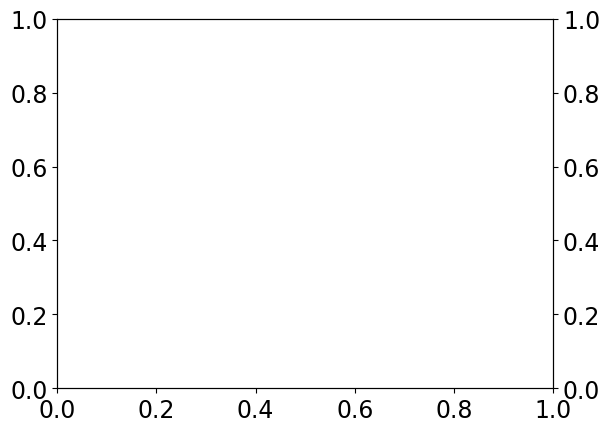

In [5]:
graph_poison_distances(['results_for_diss/attack_xception_full_baseline_v2/distances/dist1.txt',
                        'results_for_diss/attack_xception_full_baseline_v2/distances/dist2.txt',
                        'results_for_diss/attack_xception_full_baseline_v2/distances/dist3.txt',
                        'results_for_diss/attack_xception_full_baseline_v2/distances/dist4.txt',
                        'results_for_diss/attack_xception_full_baseline_v2/distances/dist5.txt'],
                       8000)

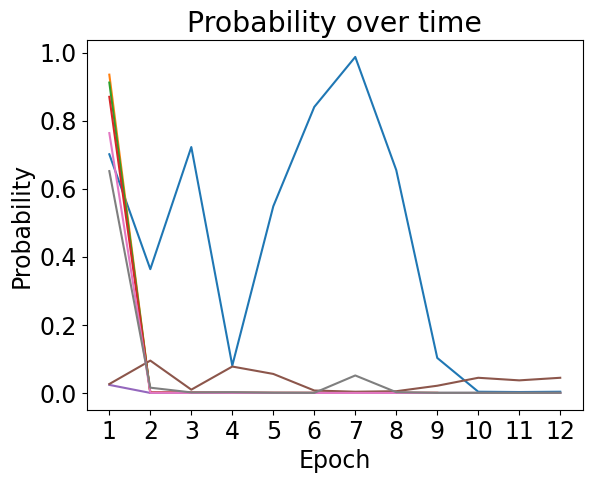

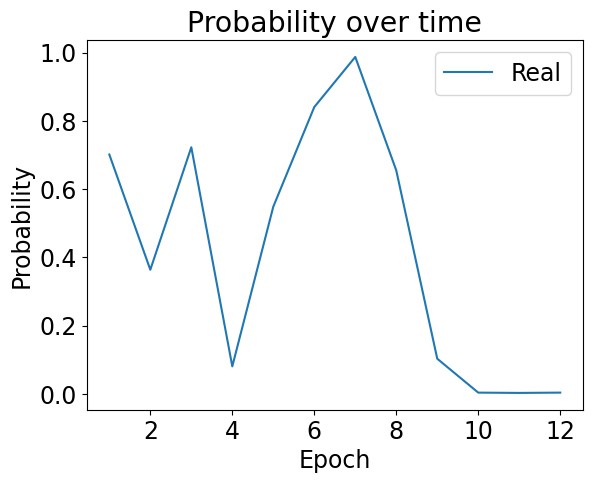

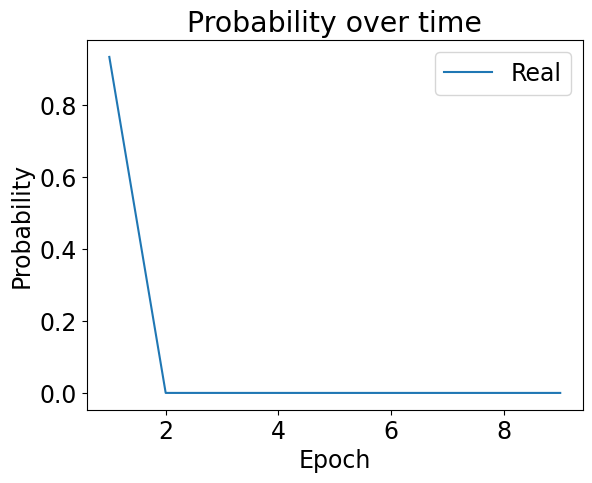

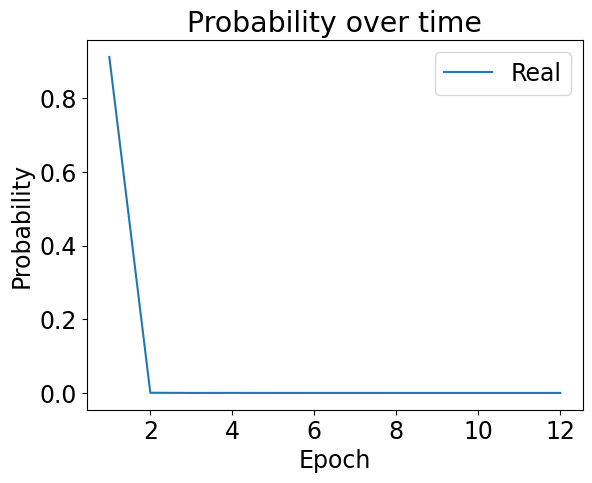

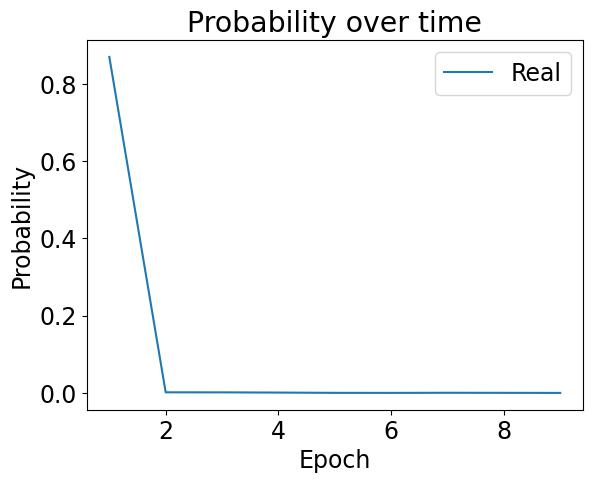

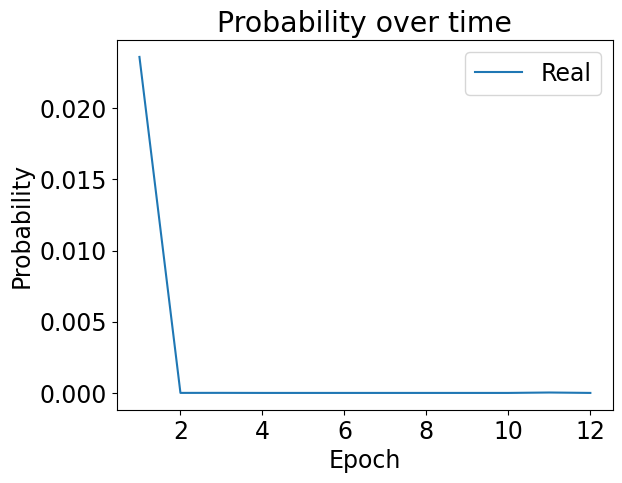

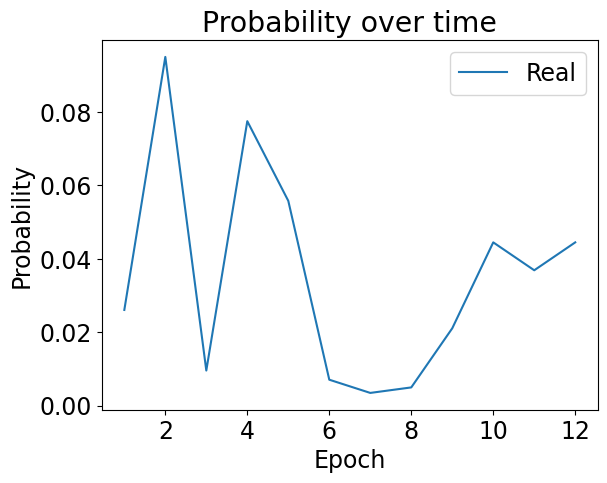

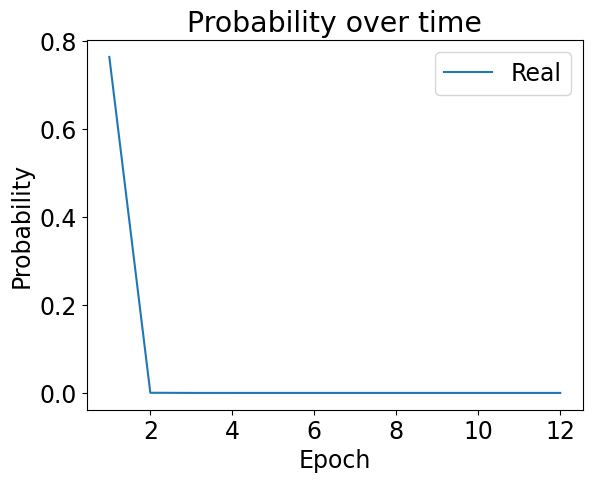

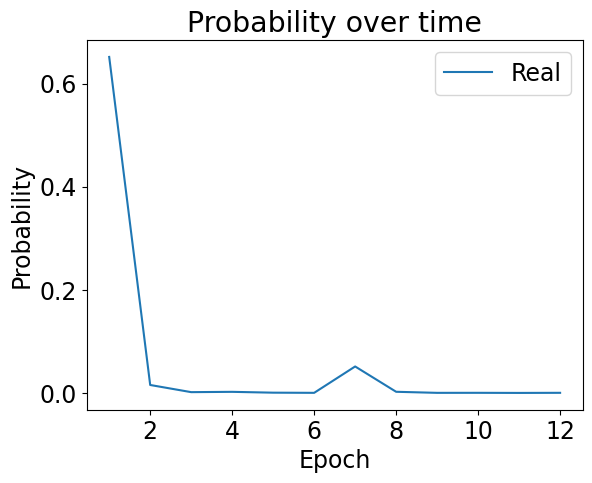

In [10]:
def graph_target_class_over_time(file):
    predictions = get_predictions2(file)
    real_predictions = [p[0] for p in predictions]
    epochs = range(1, len(predictions)+1)
    plt.plot(epochs, real_predictions, label='Real')
    plt.xlabel('Epoch')
    plt.ylabel('Probability')
    plt.title(f'Probability over time')
    plt.legend()
    plt.show()
    
def graph_target_class_over_time2(files):
    for file in files:
        predictions = get_predictions2(file)
        real_predictions = [p[0] for p in predictions]
        epochs = range(1, len(predictions)+1)
        plt.plot(epochs, real_predictions)
    plt.xlabel('Epoch')
    plt.ylabel('Probability')
    plt.xticks(epochs)
    plt.title(f'Probability over time')
    plt.show()

graph_target_class_over_time2([
    'results_for_diss/attack_meso_face_baseline_v2/attack_meso_face_baseline_v2.o41630327',
    'results_for_diss/attack_meso_face_baseline_v2/attack_meso_face_baseline_v2.o41630330',
    'results_for_diss/attack_meso_face_baseline_v2/attack_meso_face_baseline_v2.o41634167',
    'results_for_diss/attack_meso_face_baseline_v2/attack_meso_face_baseline_v2.o41634168',
    'results_for_diss/attack_meso_face_baseline_v2/attack_meso_face_baseline_v2.o41634169',
    'results_for_diss/attack_meso_face_baseline_v2/attack_meso_face_baseline_v2.o41634170',
    'results_for_diss/attack_meso_face_baseline_v2/attack_meso_face_baseline_v2.o41634899',
    'results_for_diss/attack_meso_face_baseline_v2/attack_meso_face_baseline_v2.o41634900'
])
    
graph_target_class_over_time('results_for_diss/attack_meso_face_baseline_v2/attack_meso_face_baseline_v2.o41630327')
graph_target_class_over_time('results_for_diss/attack_meso_face_baseline_v2/attack_meso_face_baseline_v2.o41630330')
graph_target_class_over_time('results_for_diss/attack_meso_face_baseline_v2/attack_meso_face_baseline_v2.o41634167')
graph_target_class_over_time('results_for_diss/attack_meso_face_baseline_v2/attack_meso_face_baseline_v2.o41634168')
graph_target_class_over_time('results_for_diss/attack_meso_face_baseline_v2/attack_meso_face_baseline_v2.o41634169')
graph_target_class_over_time('results_for_diss/attack_meso_face_baseline_v2/attack_meso_face_baseline_v2.o41634170')
graph_target_class_over_time('results_for_diss/attack_meso_face_baseline_v2/attack_meso_face_baseline_v2.o41634899')
graph_target_class_over_time('results_for_diss/attack_meso_face_baseline_v2/attack_meso_face_baseline_v2.o41634900')